In [64]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('/content/raw.githubusercontent.com_alexeygrigorev_mlbookcamp-code_master_chapter-02-car-price_data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## **Keep only the columns we need and drop any other columns**

In [4]:
df1 = df.drop(columns=['Engine Fuel Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Popularity'])

In [5]:
df1

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## **Lowercase the column names and replace spaces with underscores**

In [6]:
df1.columns = df1.columns.str.lower().str.replace(' ', '_')

In [7]:
df1

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## **Discover the dataframe datatypes**

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


## **Discover the unique values of the 4 categorical columns**

In [9]:
df1['make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [10]:
df1['model'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X',
       '9000', '900', '90', '911', '928', '929', '940', '944', '960',
       '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Acclaim'

In [11]:
df1['transmission_type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [12]:
df1['vehicle_style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

## **Encode categorical columns by one-hot-encoding**

In [13]:
data_to_dict = df1.to_dict(orient='records')

vec = DictVectorizer(sparse=False)

encoded_data = vec.fit_transform(data_to_dict)

df1 = pd.DataFrame(encoded_data, columns=vec.get_feature_names_out())

In [14]:
#df1 = pd.get_dummies(df1, columns=['make', 'model', 'transmission_type', 'vehicle_style'], prefix=['make', 'model', 'type', 'style'])

In [15]:
df1

,city_mpg,engine_cylinders,engine_hp,highway_mpg,make=Acura,make=Alfa Romeo,make=Aston Martin,make=Audi,make=BMW,make=Bentley,...,vehicle_style=Convertible SUV,vehicle_style=Coupe,vehicle_style=Crew Cab Pickup,vehicle_style=Extended Cab Pickup,vehicle_style=Passenger Minivan,vehicle_style=Passenger Van,vehicle_style=Regular Cab Pickup,vehicle_style=Sedan,vehicle_style=Wagon,year
0,19.0,6.0,335.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
1,19.0,6.0,300.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
2,20.0,6.0,300.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
3,18.0,6.0,230.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
4,18.0,6.0,230.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
11910,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
11911,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
11912,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0


## **Lowercase the new column names and replace = with underscores**

In [18]:
df1.columns = df1.columns.str.lower().str.replace('=', '_')

In [19]:
df1

,city_mpg,engine_cylinders,engine_hp,highway_mpg,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bmw,make_bentley,...,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon,year
0,19.0,6.0,335.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
1,19.0,6.0,300.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
2,20.0,6.0,300.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
3,18.0,6.0,230.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
4,18.0,6.0,230.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
11910,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
11911,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0
11912,16.0,6.0,300.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0


## **Check the missing values**

In [21]:
df1.isna().sum()

city_mpg                             0
engine_cylinders                    30
engine_hp                           69
highway_mpg                          0
make_acura                           0
                                    ..
vehicle_style_passenger_van          0
vehicle_style_regular_cab_pickup     0
vehicle_style_sedan                  0
vehicle_style_wagon                  0
year                                 0
Length: 990, dtype: int64

## **Fill the missing values with 0**

In [23]:
df1.fillna(0, inplace=True)

In [24]:
df1.isna().sum()

city_mpg                            0
engine_cylinders                    0
engine_hp                           0
highway_mpg                         0
make_acura                          0
                                   ..
vehicle_style_passenger_van         0
vehicle_style_regular_cab_pickup    0
vehicle_style_sedan                 0
vehicle_style_wagon                 0
year                                0
Length: 990, dtype: int64

## **Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average**

In [27]:
average_price = df1['msrp'].mean()

In [28]:
df1['above_average'] = df1['msrp'].apply(lambda x: 1 if x > average_price else 0)

In [29]:
df1.head()

,city_mpg,engine_cylinders,engine_hp,highway_mpg,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bmw,make_bentley,...,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon,year,above_average
0,19.0,6.0,335.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,1
1,19.0,6.0,300.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,1
2,20.0,6.0,300.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,0
3,18.0,6.0,230.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,0
4,18.0,6.0,230.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,0


In [31]:
df1 = df1.drop(columns=['msrp'])

## **Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1**

In [32]:
x = df1.drop(columns=['above_average'])
y = df1['above_average']

In [34]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)

## **Question 1: ROC AUC feature importance**

In [42]:
auc_score_hp = roc_auc_score(y_train, x_train['engine_hp'])
print(f'AUC for engine_hp: {auc_score_hp:.2f}')

AUC for engine_hp: 0.92


In [44]:
auc_score_cy = roc_auc_score(y_train, x_train['engine_cylinders'])
print(f'AUC for engine_cylinders: {auc_score_cy:.2f}')

AUC for engine_cylinders: 0.77


In [45]:
auc_score_hm = roc_auc_score(y_train, x_train['highway_mpg'])
print(f'AUC for highway_mpg: {auc_score_hm:.2f}')

AUC for highway_mpg: 0.37


In [46]:
auc_score_cm = roc_auc_score(y_train, x_train['city_mpg'])
print(f'AUC for city_mpg: {auc_score_cm:.2f}')

AUC for city_mpg: 0.33


### The numerical variable which has the highest AUC is "engine_hp"

### **Question 2: Training the model**

In [48]:
logreg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [51]:
y_val_probs = logreg.predict_proba(x_temp)[:, 1]

auc_score_lg = roc_auc_score(y_temp, y_val_probs)

In [52]:
auc_score_lg

0.9797706477304834

### the AUC of this model on the validation dataset? (round to 3 digits) is:

### 0.979

## **Question 3: Precision and Recall**

In [55]:
precisions = []
recalls = []

thresholds = np.arange(0, 1.0, 0.01)
for threshold in thresholds:
    y_val_pred = (y_val_probs >= threshold).astype(int)
    precision, recall, _ = precision_recall_curve(y_temp, y_val_pred)
    if len(precision) > 1 and len(recall) > 1:
        precisions.append(precision[1])
        recalls.append(recall[1])

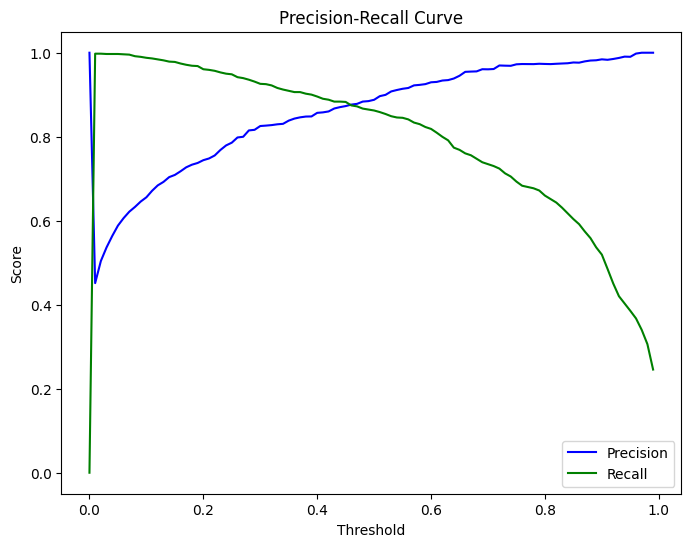

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### At which threshold precision and recall curves intersect?

### 0.48

## **Question 4: F1 score**

In [57]:
f1_scores = []
thresholds = np.arange(0, 1.0, 0.01)

for threshold in thresholds:
    y_val_pred = (y_val_probs >= threshold).astype(int)
    precision = np.sum(y_val_pred * y_temp) / np.sum(y_val_pred)
    recall = np.sum(y_val_pred * y_temp) / np.sum(y_temp)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1)

In [62]:
max_f1_score = max(f1_scores)

In [63]:
max_f1_score

0.8782403770620583

## **Question 5: 5-Fold CV**

In [65]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []
for train_idx, val_idx in kf.split(x):
    x_trainn, x_vall = x.iloc[train_idx], x.iloc[val_idx]
    y_trainn, y_vall = y.iloc[train_idx], y.iloc[val_idx]

    # Initialize and train the Logistic Regression model
    lg_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    lg_model.fit(x_trainn, y_trainn)

    # Predict on validation set and compute AUC
    y_val_probs = lg_model.predict_proba(x_vall)[:, 1]
    auc = roc_auc_score(y_vall, y_val_probs)
    auc_scores.append(auc)

In [66]:
auc_scores

[0.979497095590107,
 0.9769802906587528,
 0.9810697142085331,
 0.9788305067440296,
 0.9792405129274396]

In [67]:
std_of_auc = np.std(auc_scores)

In [68]:
std_of_auc

0.0013130275463350172

### How large is standard devidation of the scores across different folds?

### 0.003

## **Question 6: Hyperparemeter Tuning**

In [71]:
c_values = [0.01, 0.1, 0.5, 10]

k = KFold(n_splits=5, shuffle=True, random_state=1)

In [70]:
results = {}

In [73]:
for c in c_values:
    auc_scores = []

    for train_idx, val_idx in kf.split(x):
        x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Initialize and train the Logistic Regression model with the current C value
        logreg = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        logreg.fit(x_train, y_train)

        # Predict on validation set and compute AUC
        y_val_probs = logreg.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_probs)
        auc_scores.append(auc)

    # Calculate mean and std of AUC scores for the current C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)

    # Store mean and std in the results dictionary
    results[c] = {'mean_auc': round(mean_auc, 3), 'std_auc': round(std_auc, 3)}

In [75]:
for c, scores in results.items():
    print(f'C={c}: Mean AUC={scores["mean_auc"]}, Std={scores["std_auc"]}')

C=0.01: Mean AUC=0.954, Std=0.002
C=0.1: Mean AUC=0.972, Std=0.002
C=0.5: Mean AUC=0.978, Std=0.002
C=10: Mean AUC=0.977, Std=0.002


### Which C leads to the best mean score?

### 0.5